In [62]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as pl

In [43]:
all_data = pd.DataFrame()

In [44]:
for date in os.listdir('C:/Users/gena2/Desktop/KarpovCourses/lessson4_dirty_data/mini_project_merge_dataframes/data/'):
    for name in os.listdir('C:/Users/gena2/Desktop/KarpovCourses/lessson4_dirty_data/mini_project_merge_dataframes/data/'+date+'/'):
        for file in os.listdir('C:/Users/gena2/Desktop/KarpovCourses/lessson4_dirty_data/mini_project_merge_dataframes/data/'+date+'/'+name+'/'):
            data = pd.read_csv('C:/Users/gena2/Desktop/KarpovCourses/lessson4_dirty_data/mini_project_merge_dataframes/data/'+date+'/'+name+'/'+file)
            data['date'] = date
            data['name'] = name
            all_data = pd.concat([all_data,data],ignore_index=True)

In [46]:
all_data.head()

,Unnamed: 0,product_id,quantity,date,name
0,0,47,1,2020-12-03,Alexey_Smirnov
1,1,57,1,2020-12-03,Alexey_Smirnov
2,2,14,2,2020-12-03,Alexey_Smirnov
3,3,52,1,2020-12-03,Alexey_Smirnov
4,4,1,4,2020-12-03,Alexey_Smirnov


In [47]:
all_data.quantity.sum()

480

In [54]:
#какой пользователь купил больше всего товаров
all_data.groupby('name',as_index=False).agg({'quantity':'sum'}).sort_values('quantity')

,name,quantity
20,Vasiliy_Petrov,7
2,Alexey_Petrov,7
15,Rostislav_Ivanov,9
8,Kirill_Petrov,9
12,Petr_Petrov,14
18,Vasiliy_Fedorov,15
14,Rostislav_Fedorov,16
1,Alexey_Ivanov,17
17,Rostislav_Smirnov,17
9,Kirill_Smirnov,17


In [55]:
all_data

,Unnamed: 0,product_id,quantity,date,name
0,0,47,1,2020-12-03,Alexey_Smirnov
1,1,57,1,2020-12-03,Alexey_Smirnov
2,2,14,2,2020-12-03,Alexey_Smirnov
3,3,52,1,2020-12-03,Alexey_Smirnov
4,4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...,...
156,1,66,4,2020-12-09,Rostislav_Petrov
157,2,39,2,2020-12-09,Rostislav_Petrov
158,0,82,4,2020-12-09,Vasiliy_Ivanov
159,1,74,2,2020-12-09,Vasiliy_Ivanov


In [73]:
most_popular_product = all_data.groupby('product_id',as_index=False).agg({'quantity':'sum'}).sort_values('quantity')

In [74]:
most_popular_product

,product_id,quantity
39,52,1
56,80,1
18,21,1
43,57,1
30,39,2
...,...,...
32,41,14
21,24,15
51,74,15
42,56,18


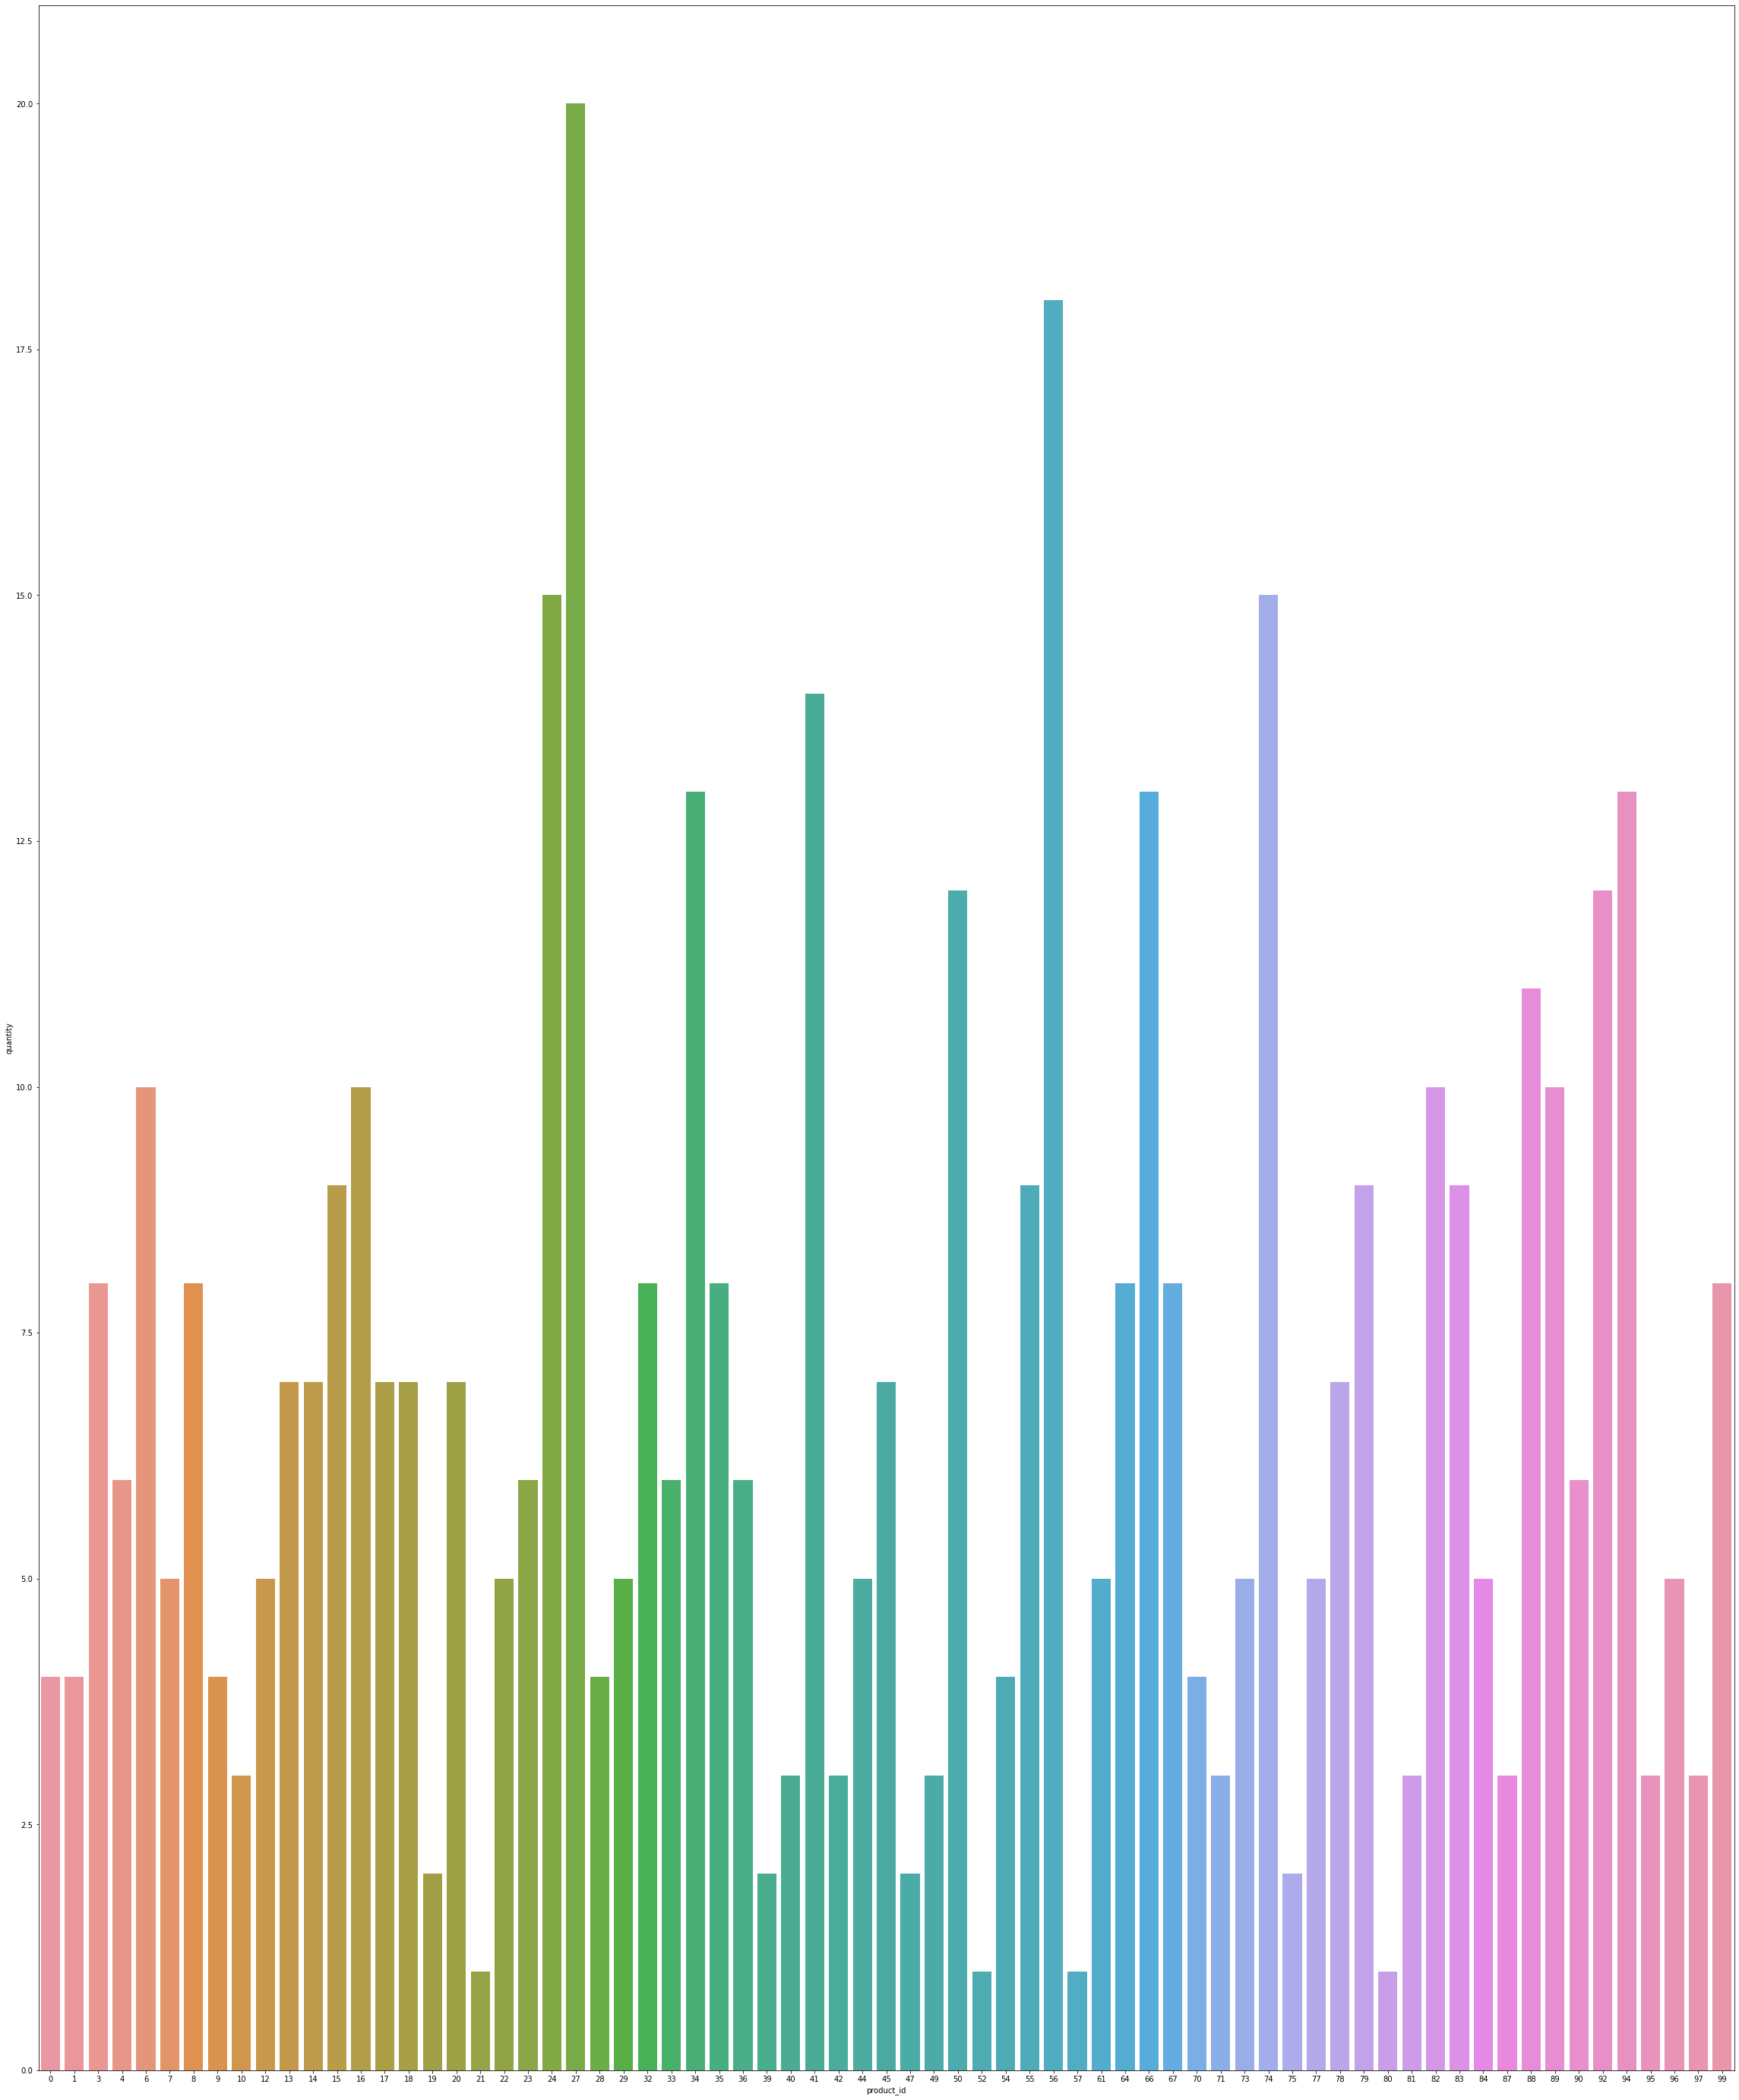

In [75]:
# топ-10 товаров по числу проданных единиц за всё время 
plt.figure(figsize=(40,50))
ax = sns.barplot(x='product_id',y='quantity',data = most_popular_product)

In [88]:
most_popular_day=all_data.groupby("date",as_index=False).agg({'quantity':'sum'})

In [89]:
most_popular_day

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


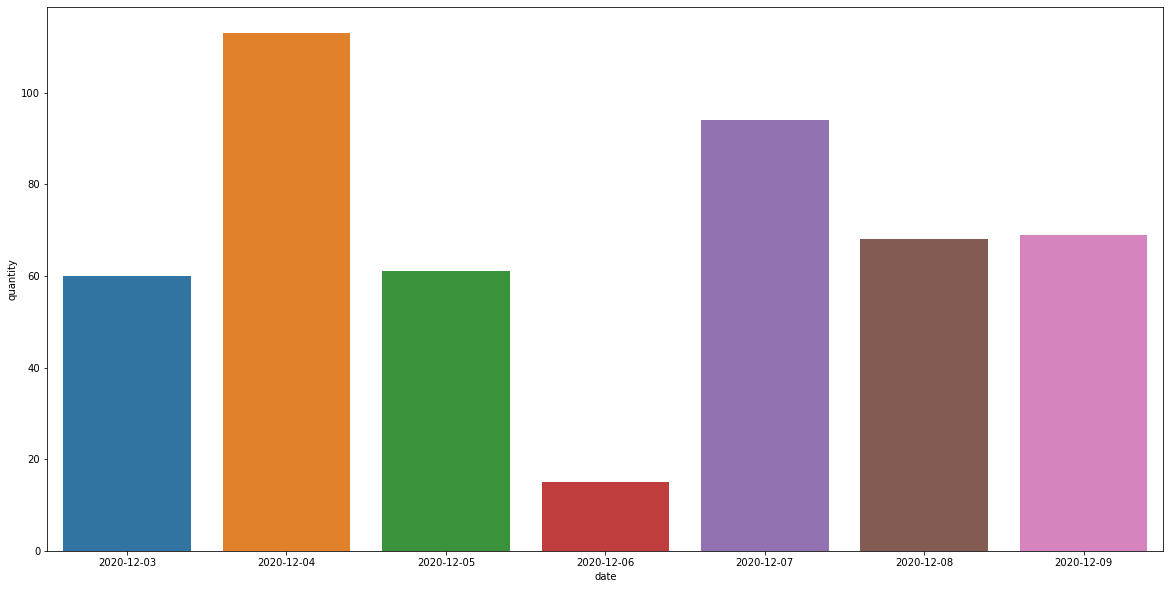

In [90]:
#Продажи по дням
plt.figure(figsize=(20,10))
ax = sns.barplot(x=most_popular_day.date,y=most_popular_day.quantity)

In [91]:
all_data

,Unnamed: 0,product_id,quantity,date,name
0,0,47,1,2020-12-03,Alexey_Smirnov
1,1,57,1,2020-12-03,Alexey_Smirnov
2,2,14,2,2020-12-03,Alexey_Smirnov
3,3,52,1,2020-12-03,Alexey_Smirnov
4,4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...,...
156,1,66,4,2020-12-09,Rostislav_Petrov
157,2,39,2,2020-12-09,Rostislav_Petrov
158,0,82,4,2020-12-09,Vasiliy_Ivanov
159,1,74,2,2020-12-09,Vasiliy_Ivanov


In [100]:
#Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)?
all_data.drop_duplicates(subset=['date','name','product_id']) \
    .groupby(["name","product_id"]) \
    .date.count().sort_values(ascending=False)

name            product_id
Anton_Ivanov    15            2
Petr_Fedorov    94            2
Alexey_Fedorov  13            1
Petr_Smirnov    21            1
Petr_Petrov     64            1
                             ..
Anton_Smirnov   28            1
                33            1
                34            1
                40            1
Vasiliy_Petrov  78            1
Name: date, Length: 158, dtype: int64